<a href="https://colab.research.google.com/github/shahshrivats/Tutorial-for-mdst/blob/main/checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [23]:
data = pd.read_csv('states_edu.csv')
print(data.head())


       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [24]:
data = data.dropna(subset=['AVG_MATH_4_SCORE'])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset?

In [28]:
chosen_test = 'AVG_MATH_4_SCORE'
years_logged = data['YEAR'].nunique()
print(f"Number of years logged: {years_logged}")

Number of years logged: 13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [29]:
michigan_avg = data[data['STATE'] == 'MICHIGAN'][chosen_test].mean()
ohio_avg = data[data['STATE'] == 'OHIO'][chosen_test].mean()
print(f"Michigan Avg: {michigan_avg}, Ohio Avg: {ohio_avg}")

Michigan Avg: 234.36363636363637, Ohio Avg: 239.45454545454547


Find the average for your chosen test across all states in 2019

In [30]:
avg_2019 = data[data['YEAR'] == 2019][chosen_test].mean()
print(f"Average Grade 4 Math score in 2019: {avg_2019}")


Average Grade 4 Math score in 2019: 239.9433962264151


For each state, find a maximum value for your chosen test score

In [31]:
max_per_state = data.groupby('STATE')[chosen_test].max()
print(max_per_state.head())

STATE
ALABAMA       233.0
ALASKA        237.0
ARIZONA       240.0
ARKANSAS      240.0
CALIFORNIA    235.0
Name: AVG_MATH_4_SCORE, dtype: float64


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [32]:
# Create a new feature: Expenditure per student
data['EXPENDITURE_PER_STUDENT'] = data['TOTAL_EXPENDITURE'] / data['ENROLL']

# Check the first few rows to verify
print(data[['TOTAL_EXPENDITURE', 'ENROLL', 'EXPENDITURE_PER_STUDENT']].head())


   TOTAL_EXPENDITURE  ENROLL  EXPENDITURE_PER_STUDENT
0          2653798.0     NaN                      NaN
2          3401580.0     NaN                      NaN
3          1743022.0     NaN                      NaN
4         27138832.0     NaN                      NaN
5          3264826.0     NaN                      NaN


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

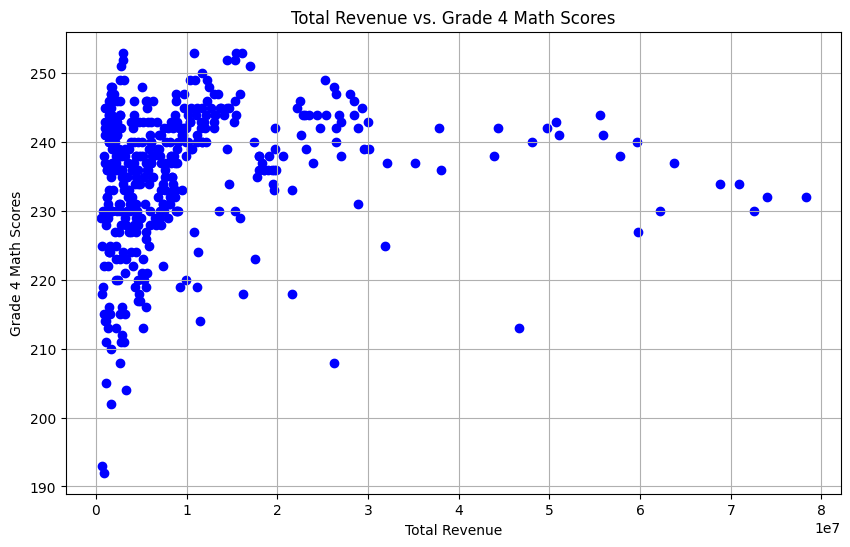

In [34]:
import matplotlib.pyplot as plt

# Visualization 1: Total revenue vs. Grade 4 Math scores
plt.figure(figsize=(10,6))
plt.scatter(data['TOTAL_REVENUE'], data[chosen_test], color='blue')
plt.title('Total Revenue vs. Grade 4 Math Scores')
plt.xlabel('Total Revenue')
plt.ylabel('Grade 4 Math Scores')
plt.grid(True)
plt.show()


[link text](https://)**<CAPTION FOR VIZ 1>**

**Visualization 2**

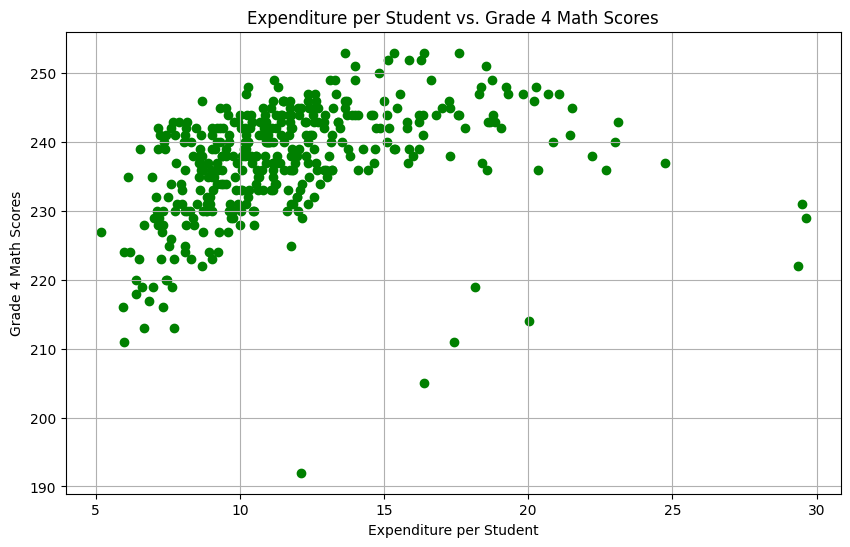

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(data['EXPENDITURE_PER_STUDENT'], data[chosen_test], color='green')
plt.title('Expenditure per Student vs. Grade 4 Math Scores')
plt.xlabel('Expenditure per Student')
plt.ylabel('Grade 4 Math Scores')
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [43]:
X = data[['TOTAL_REVENUE', 'EXPENDITURE_PER_STUDENT']]
y = data[chosen_test]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [39]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")